In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
cancer = load_breast_cancer()

In [3]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [4]:
features = pd.DataFrame(cancer.data, columns=cancer.feature_names)
target = pd.DataFrame(cancer.target, columns=["TARGET"])

In [5]:
data = pd.concat([features, target], axis=1)

In [26]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TARGET
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,0


In [7]:
a = data.corr('pearson')
a

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TARGET
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [8]:
abs(a.loc['TARGET']).sort_values(ascending=False)

TARGET                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

In [123]:
x = np.array(data['worst texture'])
y = np.array(data['TARGET'])

x = x/x.mean()

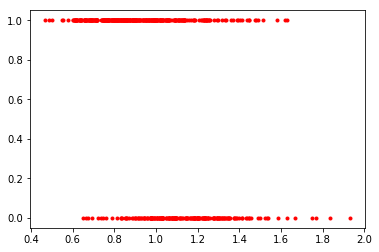

In [124]:
plt.plot(x, y, 'r.')

In [125]:
n = int(0.8 * len(x))

x_train = x[:n]
y_train = y[:n]

x_test = x[n:]
y_test = y[n:]

In [126]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [127]:
def error(a, b, x ,y):
    error = 0
    m = len(x)
    for i in range(m):
        z = a*x[i] + b
        error = y[i]*np.log(sigmoid(z)) + (1-y[i])*np.log(1-sigmoid(z))
    
    return (-1/m) * error

In [128]:
def step_gradient(a, b, x, y, learning_rate):
    grad_a = 0
    grad_b = 0
    m = len(x)
    for i in range(m):
        z = a*x[i] + b
        grad_a += 1/m * (sigmoid(z) - y[i]) * x[i]
        grad_b += 1/m * (sigmoid(z) - y[i]) 
    
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    return a, b

In [129]:
def descend(initial_a, initial_b, x, y, learning_rate, iterations):
    a = initial_a
    b = initial_b
    for i in range(iterations):
        e = error(a, b, x, y)
        if i % 1000 == 0:
            print(f'Error:{e}')
        
        a, b = step_gradient(a, b, x, y, learning_rate)
    return a, b

In [131]:
a = 1
b = 1
learning_rate = 0.001
iterations = 10000

final_a, final_b = descend(a, b, x_train, y_train, learning_rate, iterations)

Error:0.000317205217920836
Error:0.0005111220672311584
Error:0.000715578479935692
Error:0.0008907429184078943
Error:0.0010204010886071516
Error:0.0011078371729374083
Error:0.0011633062837059912
Error:0.0011968525933208117
Error:0.0012161291630679734
Error:0.001226384564685939


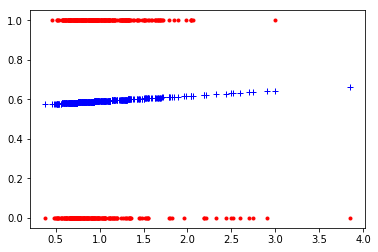

In [116]:
f = final_a * x_train + final_b
plt.plot(x_train, y_train, 'r.', x_train, sigmoid(f), 'b+')

In [117]:
final_a, final_b = descend(final_a, final_b, x_train, y_train, learning_rate, iterations)

Error:0.0011791066851857418
Error:0.0011787582603618439
Error:0.0011784728835234981
Error:0.0011782391537180717
Error:0.0011780477290598847
Error:0.0011778909557146177
Error:0.0011777625634438885
Error:0.0011776574158688905
Error:0.0011775713056838978
Error:0.0011775007867721099


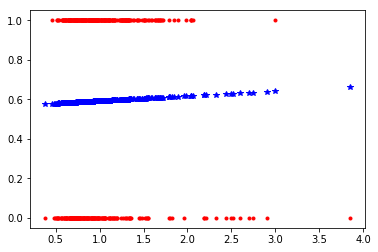

In [118]:
f = final_a * x_train + final_b
plt.plot(x_train, y_train, 'r.', x_train, sigmoid(f), 'b*')

[0.34207313 0.38846863 0.33102174 0.32429923 0.34258241 0.36656955
 0.34884657 0.33443392 0.37059287 0.318086   0.34013787 0.34192035
 0.39957095 0.3476243  0.35444866 0.36224066 0.3666714  0.32088705
 0.42238674 0.32414644 0.34395747 0.34441583 0.32944297 0.35628207
 0.4036452  0.33647104 0.31650723 0.3488975  0.3278642  0.32226211
 0.42702119 0.32628542 0.34986513 0.37201885 0.36229159 0.34431397
 0.32872997 0.40996028 0.4085343  0.3686576  0.36218973 0.35200411
 0.34064715 0.34477232 0.31930828 0.31615073 0.38638058 0.40507119
 0.37451433 0.39188081 0.39646434 0.32964668 0.37548196 0.33086895
 0.36962523 0.37751909 0.34288798 0.349254   0.34079993 0.32109076
 0.38638058 0.34181849 0.31625259 0.35490701 0.3543468  0.46598119
 0.35811548 0.33815167 0.35765713 0.35531444 0.34349912 0.33137823
 0.31991941 0.34976328 0.36234252 0.35587465 0.3362164  0.31609981
 0.40583511 0.32974854 0.36162952 0.33631826 0.34186942 0.40919636
 0.36962523 0.35612929 0.36774089 0.35765713 0.35022163 0.3383

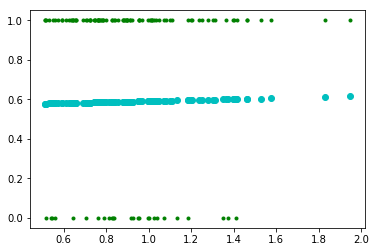

In [119]:
g = final_a * x_test + final_b
print(g)
plt.plot(x_test, y_test, 'g.', x_test, sigmoid(g), 'co')

In [120]:
def accuracy(theta, a, b, x, y):
    count = 0
    for j in range(len(x)):
        test = sigmoid(theta)

        if test[j] > 0.9:
            z = 1
        else:
            z = 0
        if y[j] == z:
            count += 1
    
    acc = count/len(y)
    print(count)
    
    print(f"Error is {100-(acc*100)}")

In [121]:
accuracy(f, final_a, final_b, x_train, y_train)

186
Error is 59.120879120879124


In [122]:
accuracy(g, final_a, final_b, x_test, y_test)

26
Error is 77.19298245614036
